In [27]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
#from sklearn import cross_validation устарело
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
iris = datasets.load_iris()
print(iris.feature_names)
# Смотрим на данные, выводим 10 первых строк: 
print (iris.data[:10])
# Смотрим на целевую переменную:
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Блок ниже делает из данных выше ДатаФрейм

In [23]:
iris_frame = DataFrame(iris.data)
#имена колонок = имена переменных:
iris_frame.columns = iris.feature_names
#Добавление столбца с целевой переменной: 
iris_frame['target'] = iris.target
#Сорта: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
#Результат
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Делим имеющиеся объекты на группы, так чтобы в группы входили похожие объекты. Алгоритм должен сам группирует объекты по «близости» расположения объектов друг к другу.
Метод основан на нахождении K центров кластеров так, чтобы среднее расстояния от них до объектов, которые им принадлежат были минимальные. Сначала алгоритм определяет K произвольных центров, далее все объекты распределяются по близости к этим центрам. 
Получаем K кластеров объектов. 
В кластерах заново вычисляются центры по среднему расстоянию до объектов, и объекты снова перераспределяются. Алгоритм работает до тех пор, пока центры кластеров не перестанут сдвигаться на какую-то определенную дельту.

In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3)

model = KMeans(n_clusters=3, random_state = 0)
model.fit(train_data)
model_predictions = model.predict(test_data)

print(accuracy_score(test_labels, model_predictions))
print(classification_report(test_labels, model_predictions))

0.17777777777777778
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        17
           2       0.89      0.67      0.76        12

    accuracy                           0.18        45
   macro avg       0.30      0.22      0.25        45
weighted avg       0.24      0.18      0.20        45



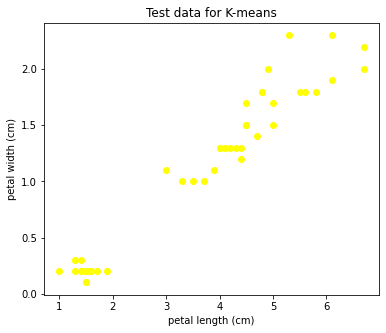

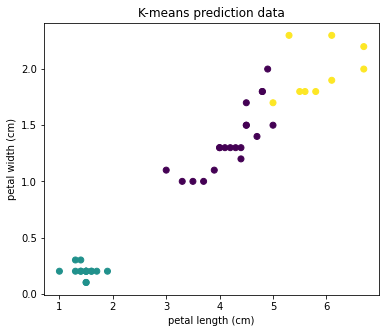

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(6, 5))
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c='yellow')

plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('Test data for K-means')
plt.show()

fig = plt.figure(1, figsize=(6, 5))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('K-means prediction data')
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c=model_predictions.astype(np.float))

plt.show()